<center><img src="images/clothing.jpg"></center>

Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, you'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Your mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

You will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, you will process the reviews, extract meaningful insights, and present your findings.

Let's get started!

## Before you start

In order to complete the project you will need to create a developer account with OpenAI and store your API key as a secure environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.

<img src="images/openai-new-secret-key.png" width="200">

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but this can vary depending on geography. You may need to add debit/credit card details. 

**This project should cost much less than 1 US cents with `gpt-4o-mini` (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

<img src="images/openai-add-payment-method.png" width="200">

3. Fill in your card details.

### Add an environmental variable with your OpenAI key

1. In the workbook, click on "Environment," in the top toolbar and select "Environment variables".

2. Click "Add" to add environment variables.

3. In the "Name" field, type "OPENAI_API_KEY". In the "Value" field, paste in your secret key.

<img src="images/datalab-env-var-details.png" width="500">

4. Click "Create", then you'll see the following pop-up window. Click "Connect," then wait 5-10 seconds for the kernel to restart, or restart it manually in the Run menu.

<img src="images/connect-integ.png" width="500">

## Load OpenAI API key from environment variables
These variables can be referenced globally throughout the project while keeping their values secret. Good for setting passwords in credentials.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import distance
from openai import OpenAI

In [2]:
# Initialize your API key
import os
openai_api_key = os.environ["OPENAI_API_KEY"]

## Install useful libraries

In [3]:
# Update OpenAI to 1.3
from importlib.metadata import version
try:
    assert version('openai') == '1.3.0'
except:
    !pip install openai==1.3.0
import openai

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crewai 0.30.11 requires openai<2.0.0,>=1.13.3, but you have openai 1.3.0 which is incompatible.
langchain-openai 0.1.7 requires openai<2.0.0,>=1.24.0, but you have openai 1.3.0 which is incompatible.


In [4]:
# Run this cell to install ChromaDB if desired
try:
    assert version('chromadb') == '0.4.17'
except:
    !pip install chromadb==0.4.17
try:
    assert version('pysqlite3') == '0.5.2'
except:
    !pip install pysqlite3-binary==0.5.2
__import__('pysqlite3')
import sys
sys.modules['sqlite3'] = sys.modules.pop('pysqlite3')
import chromadb

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
embedchain 0.1.113 requires chromadb<0.5.0,>=0.4.24, but you have chromadb 0.4.17 which is incompatible.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 60.9 MB/s eta 0:00:00


## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [5]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")
reviews = reviews.dropna(subset=['Review Text'])
print(f'Working with {len(reviews)} valid reviews')

# Display the first few entries
reviews.head()

Working with 958 valid reviews


,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
# Initialize OpenAI Client
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

In [7]:
# Step 1: Create and store the embeddings
print("Generating embeddings for all reviews...")
# Generate embeddings and store in variabl 'embeddings' as required
embeddings = []
for i, review in enumerate(reviews['Review Text']):
    # Adding progress tracking since we're processing all reviews
    if i % 100 ==0:
        print(f"Processing review {i}/{len(reviews)}")
    response = client.embeddings.create(
        input=[review.replace("\n", " ")],
        model="text-embedding-ada-002"
    )
    embeddings.append(response.data[0].embedding)

Generating embeddings for all reviews...
Processing review 0/958
Processing review 100/958
Processing review 200/958
Processing review 300/958
Processing review 400/958
Processing review 500/958
Processing review 600/958
Processing review 700/958
Processing review 800/958
Processing review 900/958


In [8]:
# Important: Do NOT convert embeddings to numpy array here
# The project requires embeddings to be a list of lists
print(f"Created {len(embeddings)} embeddings of dimension {len(embeddings[0])}")

Created 958 embeddings of dimension 1536


Applying t-SNE for dimensionality reduction...
Reduced embeddings to 2D array with shape: (958, 2)


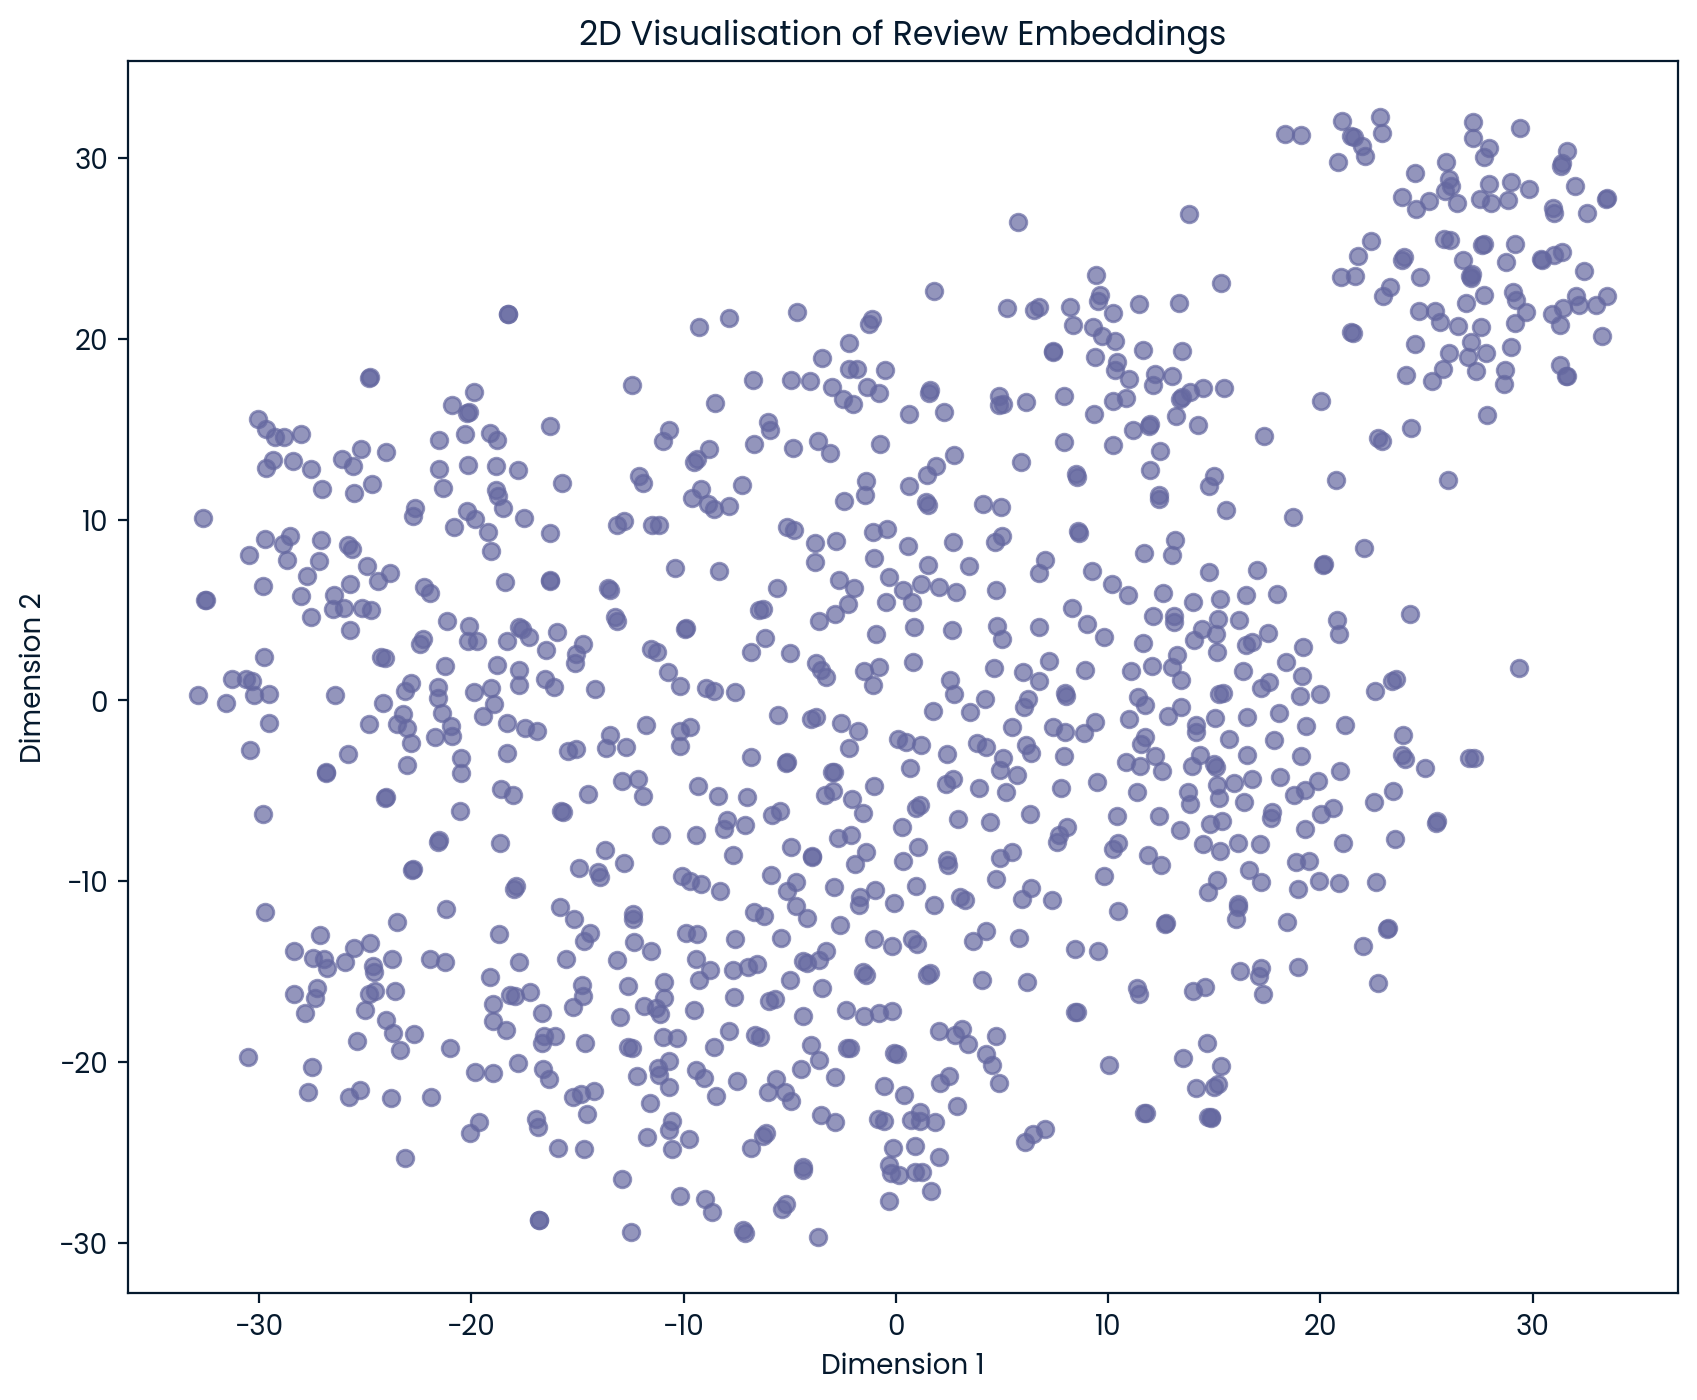

In [9]:
# Step 2: Dimensionality reduction & visualization
print("Applying t-SNE for dimensionality reduction...")
# Create a temporary numpy array for t-SNE processing
embeddings_np = np.array(embeddings)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_np)
print(f"Reduced embeddings to 2D array with shape: {embeddings_2d.shape}")

# Create 2D visualization
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)
plt.title('2D Visualisation of Review Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [10]:
# Step 3: Feedback categorization
print("Categorizing reviews by topics...")
topics = ["quality", "fit", "style", "comfort", "price"]
topic_embeddings = []

for topic in topics:
    response = client.embeddings.create(
        input=[topic],
        model="text-embedding-ada-002"
    )
    topic_embeddings.append(response.data[0].embedding)

# Find reviews related to each topic
print("\nReviews by topic:")
for i, topic in enumerate(topics):
    # Calculate similarities
    similarities = [1 - distance.cosine(topic_embeddings[i], emb) for emb in embeddings]
    top_indices = np.argsort(similarities)[-3:][::-1]

    print(f"\nReviews about {topic.upper()}:")
    for idx in top_indices:
        print(f"- {reviews.iloc[idx]['Review Text'][:100]}...")

Categorizing reviews by topics...

Reviews by topic:

Reviews about QUALITY:
- This top is soo pretty with a cool edge.
it looks and feels like really good quality....
- The jacket is great, the quality is very good and the fit too, the best part is how it looks !...
- Sits at waist, length is perfect for petite, quality is very good, looks very nice on me, very recom...

Reviews about FIT:
- Perfect fit! can be dressed up or down! more colors please!...
- The fit on these pants is just right for me. i have curvy hips and a slender waste and legs. these p...
- I am pear-shaped and often have a hard time finding pants that fit just right. these did the trick!!...

Reviews about STYLE:
- Great style!...
- Love it; the bit of stretch in the denim makes it less stiff than traditional denim....
- This is a fabulous style top! highly recommend this top. comfortable material. retailer is consisten...

Reviews about COMFORT:
- For a now feel, that comfy and well made, this was a great choice!.

In [11]:
# Step 4: Create similarity search function and find similar reviews to the first review
def find_similar_reviews(input_review, reviews_data, review_embeddings, n=3):
    """Find n reviews most similar to the input review."""
    # Get embedding for input review
    input_embedding_response = client.embeddings.create(
        input=[input_review.replace("\n", " ")],
        model="text-embedding-ada-002"
    )
    input_embedding = input_embedding_response.data[0].embedding
    
    # Calculate similarities - using list of lists for embeddings
    similarities = [1 - distance.cosine(input_embedding, emb) for emb in review_embeddings]
    
    # Get indices of most similar reviews (INCLUDING exact matches)
    top_indices = np.argsort(similarities)[::-1][:n]
    
    # Return the most similar reviews
    return [reviews_data.iloc[idx]['Review Text'] for idx in top_indices]

# Get the first review
first_review = reviews.iloc[0]['Review Text']
print(f"Finding reviews similar to: \"{first_review}\"")

# Store similar reviews in variable 'most_similar_reviews' as required
most_similar_reviews = find_similar_reviews(first_review, reviews, embeddings)
print("\nMost similar reviews:")
for i, review in enumerate(most_similar_reviews):
    print(f"{i+1}. {review}")

Finding reviews similar to: "Absolutely wonderful - silky and sexy and comfortable"

Most similar reviews:
1. Absolutely wonderful - silky and sexy and comfortable
2. Very comfortable and versatile. got lots of compliments.
3. Loved this top. great design. comfortable and unique. soft material


In [12]:
# Summary of variables created as required by the project:
print("\n----- Required Variables Summary -----")
print(f"1. 'embeddings': List of embeddings for each review, length={len(embeddings)}")
print(f"2. 'embeddings_2d': 2D numpy array from dimensionality reduction, shape={embeddings_2d.shape}")
print(f"3. 'most_similar_reviews': List of the 3 most similar reviews to the first review, length={len(most_similar_reviews)}")



----- Required Variables Summary -----
1. 'embeddings': List of embeddings for each review, length=958
2. 'embeddings_2d': 2D numpy array from dimensionality reduction, shape=(958, 2)
3. 'most_similar_reviews': List of the 3 most similar reviews to the first review, length=3
